-----

### sum of the first n odd integers is equal to n2

--------

**никому не секрет, что рисовала с помощью chatgpt.  
а я вносила изменения для лучше картины и справлялась с ошибками**

-----------

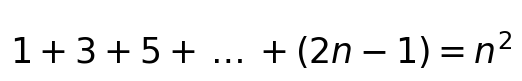

In [117]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 1))

# Hide axes
ax.axis("off")

formula = r"$1 + 3 + 5 + \dots + (2n - 1) = n^2$"
ax.text(1.3, -0.15, formula, fontsize = 25, ha = "right", va = "top", transform=ax.transAxes)

# Adjust layout to remove extra padding
plt.tight_layout()

plt.show()

--------

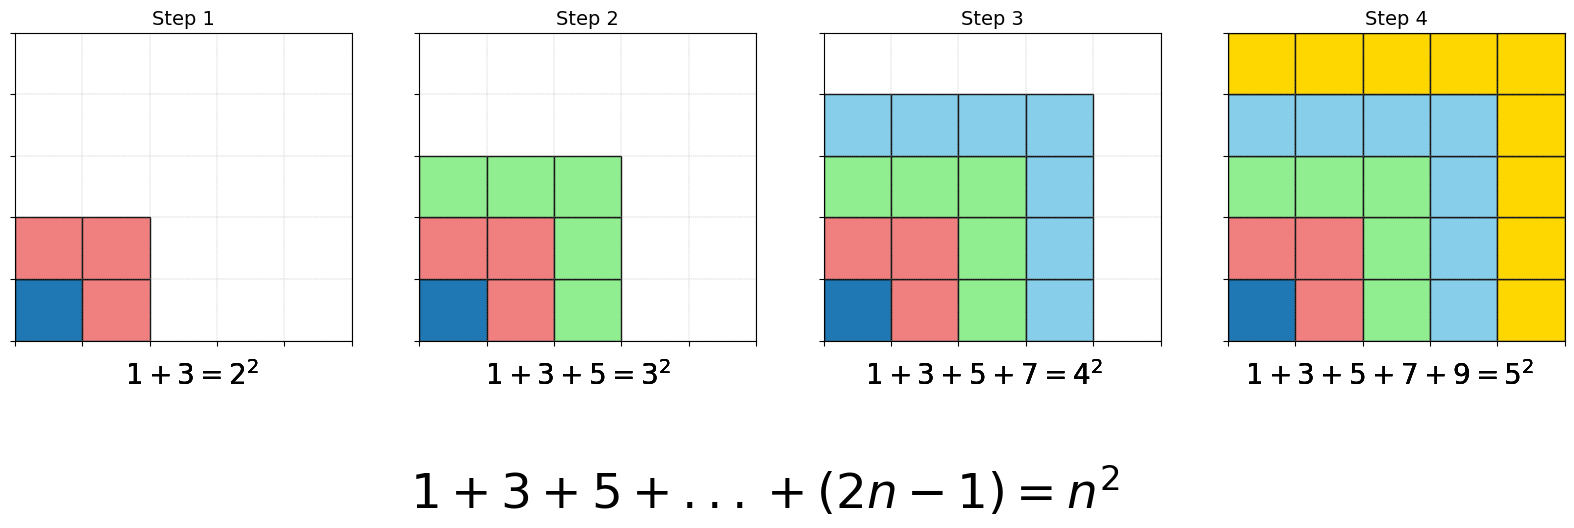

In [236]:
import matplotlib.pyplot as plt

def draw_layered_squares_fixed_colors(n):
    fig, axes = plt.subplots(1, 4, figsize=(n * 4, 4))
    colors = ['lightcoral', 'lightgreen', 'skyblue', 'gold', 'plum']

    drawn_cells = {}              # store all drawn cells with their colors

    for step in range(4):
        ax = axes[step]
        ax.set_xlim(0, n)
        ax.set_ylim(0, n)
        ax.set_xticks(range(n+1))
        ax.set_yticks(range(n+1))
        ax.grid(linestyle = "--", linewidth = 0.3)

        # start at (0,0)
        if step == 0:
            drawn_cells[(0, 0)] = None
        if step == 1:
            drawn_cells[(1, 1)] = colors[0]

        # Add new layers
        new_cells = []
        for (x, y), color in drawn_cells.items():
            new_cells.extend([
                ((x + 1, y), colors[min(step, len(colors) - 1)]),  # вправо
                ((x, y + 1), colors[min(step, len(colors) - 1)]),  # вверх
                ((x + 1, y + 1), colors[min(step, len(colors) - 1)])  # диагональ
            ])

        # Добавляем новые клетки, если их еще нет
        for (x, y), color in new_cells:
            if (x, y) not in drawn_cells:
                drawn_cells[(x, y)] = color

        # Рисуем клетки
        for (x, y), color in drawn_cells.items():
            ax.add_patch(plt.Rectangle((x, y), 1, 1, facecolor= color, edgecolor='black'))

        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_title(f"Step {step + 1}", fontsize = 14)

        plt.figtext(0.18, 0, r"$1 + 3 = 2^2$", fontsize = 20, fontweight = "bold")
        plt.figtext(0.36, 0, r"$1 + 3 + 5 = 3^2$", fontsize = 20, fontweight = "bold")
        plt.figtext(0.55, 0, r"$1 + 3 + 5 + 7 = 4^2$", fontsize = 20, fontweight = "bold")
        plt.figtext(0.74, 0, r"$1 + 3 + 5 + 7 + 9 = 5^2$", fontsize = 20, fontweight = "bold")

    plt.figtext(0.5, -0.2, r"$1 + 3 + 5 + ... + (2n - 1) = n^2$", fontsize= 35, ha = "center", va = "top", fontweight = "bold")
    plt.show()

draw_layered_squares_fixed_colors(5)

-----------

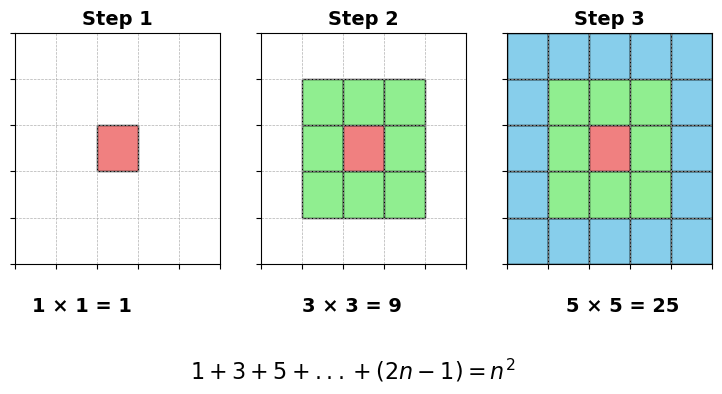

In [175]:
import numpy as np

def draw_growing_squares_corrected(n):
    fig, axes = plt.subplots(1, 3, figsize=(9, 3))
    colors = ['lightcoral', 'lightgreen', 'skyblue', 'gold', 'plum']

    # Initialize a grid to store colors
    grid = np.full((n, n), None, dtype=object)

    for step in range(3):
        ax = axes[step]
        ax.set_xlim(0, n)
        ax.set_ylim(0, n)
        ax.set_xticks(range(n+1))
        ax.set_yticks(range(n+1))
        ax.grid(True, linestyle='--', linewidth=0.5)

        center_x, center_y = n // 2, n // 2      # Center

        # Add a new layer while preserving previous ones
        size = 2 * step + 1  # Current layer size
        color = colors[step % len(colors)]  # Layer color

        start_x = max(0, center_x - step)
        start_y = max(0, center_y - step)
        end_x = min(n, center_x + step + 1)
        end_y = min(n, center_y + step + 1)

        for x in range(start_x, end_x):
            for y in range(start_y, end_y):
                if grid[x, y] is None:     # Only color empty spaces
                    grid[x, y] = color

        # Draw all patches according to stored colors
        for x in range(n):
            for y in range(n):
                if grid[x, y] is not None:
                    ax.add_patch(plt.Rectangle((x, y), 1, 1, facecolor=grid[x, y], edgecolor='black'))

        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_title(f"Step {step + 1}", fontsize=14, fontweight='bold')

    # Add step explanations directly under the respective graphs
    plt.figtext(0.2, 0, "1 × 1 = 1", fontsize=14, ha="center", va = "top", fontweight = "bold")
    plt.figtext(0.5, 0, "3 × 3 = 9", fontsize=14, ha="center", va = "top", fontweight = "bold")
    plt.figtext(0.8, 0, "5 × 5 = 25", fontsize=14, ha="center", va = "top", fontweight = "bold")
    # general formula explanation
    formula_text = r"$1 + 3 + 5 + ... + (2n - 1) = n^2$"
    plt.figtext(0.5, -0.2, formula_text, fontsize = 16, ha = "center", va = "top", fontweight = "bold")

# Draw squares ensuring prior colors remain unchanged
draw_growing_squares_corrected(5)
